# Analysis of hotels from booking.com

##### Import all necessary libraries
___


In [1]:
import pandas as pd
import os
import glob # get all hotels data (multiple csvs) into one dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels
import plotly.graph_objects as go
import copy

#### Load all the hotel data into one data frame
___

In [ ]:
# get current working directory
pwd = os.getcwd() 

files = glob.glob(pwd + '/data_csv/*.csv')

#create dataframe with all hotels data
all_hotels = pd.DataFrame()


for file in files:
            df_temp = pd.read_csv(file)
            all_hotels = all_hotels.append(df_temp, ignore_index=True)

all_hotels.drop('Unnamed: 0', axis=1, inplace=True)

#save all hotels into one csv file calls 'all_hotels.csv'
all_hotels.to_csv("all_hotels.csv")

#### Working with duplicates in dataframe
___

In [3]:
# let's see if we have duplicate rows in dataframe
all_hotels.duplicated().sum() # 2779

all_hotels[all_hotels.duplicated()]

,Hotel name,Marks,Region City,Performances,Reviews,Price,Distances,Discriptions,Stars,Breakfast,Guests reviews:
52,Canopy by Hilton Zagreb City Centre,9.0,"Lower Town, Zagreb",Wonderful,"1,827 reviews",Price 430 zł,1 km from center,Standard King Room,4,NaN,NaN
54,Rooms Zagreb 17,9.3,"Upper Town – Medvescak, Zagreb",Wonderful,544 reviews,Price 253 zł,250 m from center,Comfort Double Room,4,NaN,Location 9.9
56,Neno,7.8,"Maksimir, Zagreb",Good,446 reviews,Price 94 zł,2.1 km from center,Double Room,0,NaN,NaN
69,Hotel 9,9.0,Zagreb,Wonderful,"1,631 reviews",Price 477 zł,1.8 km from center,Standard Double Room,4,NaN,NaN
77,Hotel AS,9.0,"Upper Town – Medvescak, Zagreb",Wonderful,441 reviews,Price 430 zł,1.6 km from center,Single Deluxe,4,Breakfast included,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16089,Olive Tree Apartment of Athens - city center,9.1,"Athens City Centre, Athens",Wonderful,75 reviews,Price 414 zł,1.7 km from center,Apartment,3,NaN,NaN
16090,"Fix Metro Apartments, 5 min to Acropolis",7.0,"Koukaki, Athens",Good,65 reviews,Original price 404 zł. Current price 380 zł.,1.4 km from center,One-Bedroom Apartment (4 Adults),3,NaN,Location 9.5
16091,Amazing Suite at Glyfada with sea view & jacuzzi,9.4,"Glyfada, Athens",Wonderful,18 reviews,Price 694 zł,13.2 km from center,One-Bedroom Apartment,4,NaN,Location 10
16123,SAGITTARIUS - FALIRO SEA SIDE APARTMENT,8.9,"Palaio Faliro, Athens",Excellent,93 reviews,Price 701 zł,6.6 km from center,Apartment,4,NaN,NaN


In [4]:
# drop all duplicates
all_hotels.drop_duplicates(inplace=True)
all_hotels.duplicated().sum() 

0

In [5]:
# replace white space with underscore and make lowercase in columns name in dataframe
all_hotels.columns = [col.lower().replace(" ", "_") for col in all_hotels.columns]

# make a copy of dataframe
hotels = all_hotels.copy()
hotels.head()

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:
0,"Radisson Blu Royal Hotel, Bergen",8.2,"Bergenhus, Bergen",Very Good,"7,620 reviews",Price 574 zł,0.6 km from center,Standard Room,4,NaN,Location 9.4
1,Moxy Bergen,8.3,"Årstad, Bergen",Very Good,"2,170 reviews",Price 554 zł,1.6 km from center,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN
2,Citybox Bergen City,8.1,"Bergenhus, Bergen",Very Good,"5,861 reviews",Price 444 zł,0.6 km from center,Single Room,3,NaN,NaN
3,Fabryka,7.7,"Bergenhus, Bergen",Good,407 reviews,Price 184 zł,350 m from center,Budget Single Room,0,NaN,Location 9.3
4,Comfort Hotel Bergen,8.0,"Bergenhus, Bergen",Very Good,730 reviews,Original price 466 zł. Current price 434 zł.,0.6 km from center,Standard Double Room,3,Breakfast included,NaN


### Descriptive Statistics
___

In [6]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13359 entries, 0 to 16141
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       13359 non-null  object 
 1   marks            13214 non-null  float64
 2   region_city      13359 non-null  object 
 3   performances     13219 non-null  object 
 4   reviews          13219 non-null  object 
 5   price            13359 non-null  object 
 6   distances        13359 non-null  object 
 7   discriptions     13359 non-null  object 
 8   stars            13359 non-null  int64  
 9   breakfast        2904 non-null   object 
 10  guests_reviews:  5494 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [7]:
hotels.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel_name,13359,12334,Hotel Regina,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marks,13214.0,NaN,NaN,NaN,8.29555,0.864023,1.0,7.9,8.4,8.9,10.0
region_city,13359,790,"Fatih, Istanbul",380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
performances,13219,9,Very Good,4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews,13219,3565,1 review,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,13359,4170,Price 328 zł,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distances,13359,218,0.6 km from center,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discriptions,13359,1832,Single Room,1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stars,13359.0,NaN,NaN,NaN,2.78449,1.458375,0.0,3.0,3.0,4.0,5.0
breakfast,2904,3,Breakfast included,2897,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning
___

In [8]:
hotels['performances'].value_counts()

Very Good           4009
Good                2882
Excellent           2557
Wonderful           2218
Review score         848
Exceptional          700
Exceptional 10         3
Wonderful 9.0          1
Review score 6.2       1
Name: performances, dtype: int64

In [9]:
def clear_performances(lambda_input):
    ''' delete not necessary rows from performances column 
    such as Exceptional 10, Wonderful 9.0', Review score 6.2 '''

    useless_labels = ['Exceptional 10', 'Wonderful 9.0', 'Review score 6.2']
    try:
        if 'Review' in lambda_input:
                return 'Normal'
        elif lambda_input not in useless_labels:
            return lambda_input
        else:
            return np.nan
    except:
        return np.nan

# apply the clear_performances function to the dataframe using the apply fucntion
hotels['performances'] = hotels['performances'].apply(lambda x :clear_performances(x))
hotels['performances'].value_counts()

Very Good       4009
Good            2882
Excellent       2557
Wonderful       2218
Normal           849
Exceptional      700
Name: performances, dtype: int64

In [10]:
# spilt column region_city into two columns 
hotels['region'] = hotels['region_city'].apply(lambda x: x.split(", ")[0] if len(x.split(", ")) == 2 else np.nan)
hotels['city'] = hotels['region_city'].apply(lambda x: x.split(", ")[1] if len(x.split(", ")) == 2 else x)
hotels.head()

,hotel_name,marks,region_city,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,"Radisson Blu Royal Hotel, Bergen",8.2,"Bergenhus, Bergen",Very Good,"7,620 reviews",Price 574 zł,0.6 km from center,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen
1,Moxy Bergen,8.3,"Årstad, Bergen",Very Good,"2,170 reviews",Price 554 zł,1.6 km from center,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen
2,Citybox Bergen City,8.1,"Bergenhus, Bergen",Very Good,"5,861 reviews",Price 444 zł,0.6 km from center,Single Room,3,NaN,NaN,Bergenhus,Bergen
3,Fabryka,7.7,"Bergenhus, Bergen",Good,407 reviews,Price 184 zł,350 m from center,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen
4,Comfort Hotel Bergen,8.0,"Bergenhus, Bergen",Very Good,730 reviews,Original price 466 zł. Current price 434 zł.,0.6 km from center,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen


In [11]:
# drop unnecessary column region_city
hotels.drop(columns='region_city', inplace=True)
hotels.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,"7,620 reviews",Price 574 zł,0.6 km from center,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen
1,Moxy Bergen,8.3,Very Good,"2,170 reviews",Price 554 zł,1.6 km from center,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen
2,Citybox Bergen City,8.1,Very Good,"5,861 reviews",Price 444 zł,0.6 km from center,Single Room,3,NaN,NaN,Bergenhus,Bergen
3,Fabryka,7.7,Good,407 reviews,Price 184 zł,350 m from center,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen
4,Comfort Hotel Bergen,8.0,Very Good,730 reviews,Original price 466 zł. Current price 434 zł.,0.6 km from center,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen


In [12]:
#create a copy of hotels dataframe
hotels_edited = copy.deepcopy(hotels)

# check how many column 'reviews' has NaN values
hotels_edited['reviews'].isnull().sum() # 119

# if aren't reviews in the hotel, replace NaN values with 0
hotels_edited.dropna(axis=0, subset='reviews', inplace=True)
hotels_edited['reviews'].isnull().sum() # 0

# deleting the 'reviews' part for each rows in reviews column
hotels_edited['reviews'] = hotels_edited['reviews'].apply(lambda x: x.split(" ")[0])

# convert number of reviews to integer
hotels_edited['reviews'] = hotels_edited['reviews'].apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))
hotels_edited.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,Price 574 zł,0.6 km from center,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen
1,Moxy Bergen,8.3,Very Good,2170,Price 554 zł,1.6 km from center,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen
2,Citybox Bergen City,8.1,Very Good,5861,Price 444 zł,0.6 km from center,Single Room,3,NaN,NaN,Bergenhus,Bergen
3,Fabryka,7.7,Good,407,Price 184 zł,350 m from center,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen
4,Comfort Hotel Bergen,8.0,Very Good,730,Original price 466 zł. Current price 434 zł.,0.6 km from center,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen


In [13]:
# check how many column 'distances' has NaN values
hotels_edited.distances.isnull().sum() # 0

# deleting the 'from center' part for each rows and convert meters to kilometers
hotels_edited['distances'] = hotels_edited['distances'].apply(lambda s: float(s.split(' ')[0])/1000 if ' m ' in s else float(s.split(' ')[0]))
hotels_edited.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,Price 574 zł,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen
1,Moxy Bergen,8.3,Very Good,2170,Price 554 zł,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen
2,Citybox Bergen City,8.1,Very Good,5861,Price 444 zł,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen
3,Fabryka,7.7,Good,407,Price 184 zł,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen
4,Comfort Hotel Bergen,8.0,Very Good,730,Original price 466 zł. Current price 434 zł.,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen


In [14]:
# how many hotels have meals included in the price
hotels_edited['breakfast'].value_counts()

Breakfast included             2890
Breakfast & dinner included       6
Dinner included                   1
Name: breakfast, dtype: int64

In [15]:
# the highest reviews is given by guests for the location of the hotel
hotels_edited['guests_reviews:'].value_counts()

Location 9.5    892
Location 9.6    888
Location 9.4    881
Location 9.7    871
Location 9.3    779
Location 9.8    696
Location 9.9    294
Location 10     193
Name: guests_reviews:, dtype: int64

In [16]:
# make a copy of dataframe
hotels_modified = copy.deepcopy(hotels_edited)

def original_prices(val):
    '''Clearing the price column by deleting words 
    and converting a number to an integer'''
    res = []
    for elem in val:
        if elem.isdigit():
            res.append(elem)
        
        if elem == '.':
            return int("".join(map(str, res)))
        
    return int("".join(map(str, res)))

hotels_modified['original_price'] = hotels_modified['price'].apply(original_prices)
hotels_modified.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,Price 574 zł,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574
1,Moxy Bergen,8.3,Very Good,2170,Price 554 zł,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554
2,Citybox Bergen City,8.1,Very Good,5861,Price 444 zł,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444
3,Fabryka,7.7,Good,407,Price 184 zł,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184
4,Comfort Hotel Bergen,8.0,Very Good,730,Original price 466 zł. Current price 434 zł.,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466


In [17]:
#creating the discount_price column by extracting from the price column, if the hotel doesn't have a discounted price, replace it with NaN
hotels_modified['discount_price'] = hotels_modified['price'].apply(lambda s: s.split()[-2] if 'Current price' in s else np.nan)
hotels_modified

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,Price 574 zł,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574,NaN
1,Moxy Bergen,8.3,Very Good,2170,Price 554 zł,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554,NaN
2,Citybox Bergen City,8.1,Very Good,5861,Price 444 zł,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444,NaN
3,Fabryka,7.7,Good,407,Price 184 zł,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184,NaN
4,Comfort Hotel Bergen,8.0,Very Good,730,Original price 466 zł. Current price 434 zł.,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,Kleopatra Apartment in Acropolis,9.2,Wonderful,10,Price 423 zł,1.20,Apartment with Balcony,4,NaN,Location 9.8,Koukaki,Athens,423,NaN
16137,ATHENS BEAUTIFUL APARTMENT,4.9,Normal,9,Price 118 zł,1.40,One-Bedroom Apartment,0,NaN,NaN,Athens City Centre,Athens,118,NaN
16138,Eχquisite apt in Acropolis-plaka/vaccinatedHost,9.1,Wonderful,18,"Price 1,034 zł",1.20,Three-Bedroom Apartment,4,NaN,Location 10,Koukaki,Athens,1034,NaN
16140,Ampelokipi metro st. 2 bedrooms 6 pers. apartment,8.5,Very Good,4,Original price 408 zł. Current price 384 zł.,2.10,Two-Bedroom Apartment,4,NaN,Location 9.4,NaN,Athens,408,384


In [18]:
# make a copy of hotels with discount price
hotels_with_discount_price = hotels_modified.copy()
hotels_with_discount_price.dropna(axis=0, subset='discount_price', inplace=True) 
hotels_with_discount_price.shape # 3252 hotels have discount price

#convert discount_price to integer
hotels_with_discount_price['discount_price'] = hotels_with_discount_price['discount_price'].apply(lambda s:  int(s.replace(',', '')) if ',' in s else int(s))

# create the 'percentage_discount' by dividing the 'discount_price' column by the 'original price'
hotels_with_discount_price['percentage_discount'] = round((1 - (hotels_with_discount_price['discount_price']/hotels_with_discount_price['original_price']))*100,2)
hotels_with_discount_price.head()

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,percentage_discount
4,Comfort Hotel Bergen,8.0,Very Good,730,Original price 466 zł. Current price 434 zł.,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434,6.87
6,Det Hanseatiske Hotel,8.2,Very Good,2825,"Original price 1,111 zł. Current price 889 zł.",0.35,Junior Suite,4,Breakfast included,Location 9.6,Bergenhus,Bergen,1111,889,19.98
7,Magic Hotel Xhibition,7.2,Good,1180,Original price 466 zł. Current price 420 zł.,0.10,Single Room,3,NaN,NaN,Bergenhus,Bergen,466,420,9.87
9,Magic Hotel Korskirken,7.5,Good,1106,Original price 533 zł. Current price 480 zł.,0.25,Small Double Room - Atrium,4,Breakfast included,Location 9.3,Bergenhus,Bergen,533,480,9.94
12,Zander K Hotel,8.1,Very Good,5482,Original price 565 zł. Current price 480 zł.,0.70,Standard Queen Room,4,Breakfast included,NaN,Bergenhus,Bergen,565,480,15.04


In [19]:
# hotels with the biggest discount price
top_hotels_by_dicount = hotels_with_discount_price.sort_values(by = 'percentage_discount', ascending = False)
top_hotels_by_dicount.head(10)

,hotel_name,marks,performances,reviews,price,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,percentage_discount
3003,Ravouna 1906 Bosphorus Istanbul,8.6,Excellent,428,"Original price 2,956 zł. Current price 355 zł.",2.50,Superior Room with Garden View,4,NaN,Location 9.3,Beyoglu,Istanbul,2956,355,87.99
2167,Orka Royal Hotel & Spa,7.7,Good,3061,"Original price 1,595 zł. Current price 287 zł.",0.70,Economy Room - Free Access to Spa,4,Breakfast included,NaN,Fatih,Istanbul,1595,287,82.01
2404,Saba Sultan Hotel,9.0,Wonderful,1129,"Original price 1,140 zł. Current price 271 zł.",0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,271,76.23
2168,Saba Sultan Hotel,9.0,Wonderful,1129,"Original price 1,140 zł. Current price 285 zł.",0.60,Economy Double or Twin Room,0,NaN,Location 9.6,Fatih,Istanbul,1140,285,75.00
2784,Dundar Hotel & Spa,7.2,Good,1026,"Original price 1,478 zł. Current price 370 zł.",1.00,Economy Double Room,0,Breakfast included,NaN,Fatih,Istanbul,1478,370,74.97
9416,Prime star Deak ter Modern Luxury Apartments B...,8.6,Excellent,267,"Original price 1,758 zł. Current price 440 zł.",0.15,Deluxe Apartment,4,NaN,Location 9.5,07. Erzsébetváros,Budapest,1758,440,74.97
2370,Lausos Hotel Sultanahmet,6.8,Normal,133,"Original price 1,623 zł. Current price 438 zł.",0.20,Standard Double Room,4,Breakfast included,NaN,Fatih,Istanbul,1623,438,73.01
2727,The Byzantium Suites Hotel & Spa,8.1,Very Good,2144,"Original price 1,360 zł. Current price 381 zł.",0.60,Budget Basement Floor Room,4,Breakfast included,Location 9.3,Fatih,Istanbul,1360,381,71.99
9738,Travel Inn Apartments,5.8,Normal,995,Original price 784 zł. Current price 235 zł.,1.10,Single Suite,3,NaN,NaN,06. Terézváros,Budapest,784,235,70.03
9682,Downtown Core Apartments,6.4,Normal,16,Original price 704 zł. Current price 211 zł.,0.60,Studio Apartment,3,NaN,NaN,07. Erzsébetváros,Budapest,704,211,70.03


In [20]:
# drop column price
hotels_with_discount_price.drop(columns='price', inplace=True)
hotels_modified.drop(columns='price', inplace=True)

hotels_modified.head()

,hotel_name,marks,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574,NaN
1,Moxy Bergen,8.3,Very Good,2170,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554,NaN
2,Citybox Bergen City,8.1,Very Good,5861,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444,NaN
3,Fabryka,7.7,Good,407,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184,NaN
4,Comfort Hotel Bergen,8.0,Very Good,730,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434


In [21]:
hotels_with_discount_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 4 to 16140
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hotel_name           3427 non-null   object 
 1   marks                3424 non-null   float64
 2   performances         3425 non-null   object 
 3   reviews              3427 non-null   int64  
 4   distances            3427 non-null   float64
 5   discriptions         3427 non-null   object 
 6   stars                3427 non-null   int64  
 7   breakfast            937 non-null    object 
 8   guests_reviews:      1574 non-null   object 
 9   region               3135 non-null   object 
 10  city                 3427 non-null   object 
 11  original_price       3427 non-null   int64  
 12  discount_price       3427 non-null   int64  
 13  percentage_discount  3427 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 401.6+ KB


In [22]:
# check all unique cities in dataset
hotels_modified['city'].unique()

array(['Bergen', 'Zagreb', 'Madrid', 'Seville', 'Nice', 'Venice',
       'Hamburg', 'Bologna', 'Zurich', 'Szczecin', 'Sofia', 'Istanbul',
       'Manchester', 'Toruń', 'Gdynia', 'Liverpool', 'Bordeaux',
       'Cologne', 'Bratislava', 'Skopje', 'Ankara', 'Florence',
       'Amsterdam', 'Antalya', 'Reykjavík', 'Krakow', 'Sarajevo',
       'Luxembourg', 'Frankfurt', 'Dublin', 'Vienna', 'Poznań',
       'Ljubljana', 'Marseille', 'Brussels', 'Chişinău', 'Rome',
       'Wrocław', 'Vilnius', 'Prishtinë', 'Barcelona', 'Stockholm',
       'Prague', 'Lisbon', 'Tallinn', 'Berlin', 'Leipzig', 'Łódź',
       'İzmir', 'Milan', 'Budapest', 'Heraklio', 'Porto', 'Katowice',
       'Belgrade', 'Braşov', 'Copenhagen', 'Edinburgh', 'Lublin', 'Turin',
       'Tirana', 'Munich', 'Birmingham', 'Paris', 'Naples', 'Riga',
       'Warsaw', 'Valletta', 'Podgorica', 'Helsinki', 'Oslo', 'London',
       'Athens'], dtype=object)

In [31]:
def hotels_country(city):

    dict_of_coutnry = {'Poland': [ 'Szczecin', 'Toruń', 'Gdynia', 'Krakow', 'Poznań', 'Wrocław','Łódź','Katowice', 'Lublin','Warsaw'],
                        'Spain' : ['Madrid', 'Seville', 'Barcelona'],
                        'Italy' : ['Venice', 'Bologna', 'Florence', 'Rome', 'Milan', 'Turin', 'Naples'],
                        'Portugal' : ['Lisbon', 'Porto'], 'Croatia' : ['Zagreb'], 'Slovenia' : ['Ljubljana'],
                        'Greece' : ['Athens'], 'Turkey' : ['Istanbul', 'Ankara', 'Antalya', 'İzmir'], 
                        'Cyprus' : ['Heraklio'], 'United Kingdom' : ['Manchester', 'Liverpool', 'Edinburgh', 'London', 'Birmingham'],
                        'France' : ['Nice', 'Bordeaux', 'Marseille', 'Paris'],
                        'Germany' : ['Hamburg', 'Cologne', 'Berlin', 'Leipzig', 'Munich', 'Frankfurt'],
                        'Switzerland' : ['Zurich'], 'Netherlands' : ['Amsterdam'], 'Iceland' : ['Reykjavík'], 'Ireland' : ['Dublin'], 'Belgium' : ['Brussels'],
                        'Sweden' : ['Stockholm'], 'Estonia' : ['Tallinn'], 'Denmark' : ['Copenhagen'],
                        'Finland' : ['Helsinki'], 'Latvia' : ['Riga'], 'Bulgaria' : ['Sofia'],  'Slovakia' : ['Bratislava'],
                        'Lithuania' : ['Vilnius'], 'Hungary' : ['Budapest'], 'Serbia' : ['Belgrade'], 'Romania':['Braşov'],
                        'Norway' : ['Bergen', 'Oslo'], 'North Macedonia' : ['Skopje'], 'Luxembourg' : ['Luxembourg'],
                        'Austria' : ['Vienna'],  'Moldova' : ['Chişinău'], 'Kosovo' : ['Prishtinë'], 'Bosnia and Herzegovina' : ['Sarajevo'],
                        'Czech Republic' : ['Prague'], 'Albania' : ['Tirana'], 'Malta' : ['Valletta'], 'Montenegro' : ['Podgorica']
    }


    for country, cities in dict_of_coutnry.items():
        if city in cities:
            return country   

hotels_modified['country'] = hotels_modified['city'].map(lambda city: hotels_country(city))
hotels_modified.head()

,hotel_name,marks,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,country
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574,NaN,Norway
1,Moxy Bergen,8.3,Very Good,2170,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554,NaN,Norway
2,Citybox Bergen City,8.1,Very Good,5861,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444,NaN,Norway
3,Fabryka,7.7,Good,407,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184,NaN,Norway
4,Comfort Hotel Bergen,8.0,Very Good,730,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434,Norway


# Data Visualization using matplotlib & seaborn & plotly
____

In [32]:
# make a copy of dataframe
all_hotels = hotels_modified.copy()

# cave datafreame to  csv file:
all_hotels.to_csv('all_hotels_modified.csv')

all_hotels.head()

,hotel_name,marks,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,country
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574,NaN,Norway
1,Moxy Bergen,8.3,Very Good,2170,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554,NaN,Norway
2,Citybox Bergen City,8.1,Very Good,5861,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444,NaN,Norway
3,Fabryka,7.7,Good,407,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184,NaN,Norway
4,Comfort Hotel Bergen,8.0,Very Good,730,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434,Norway


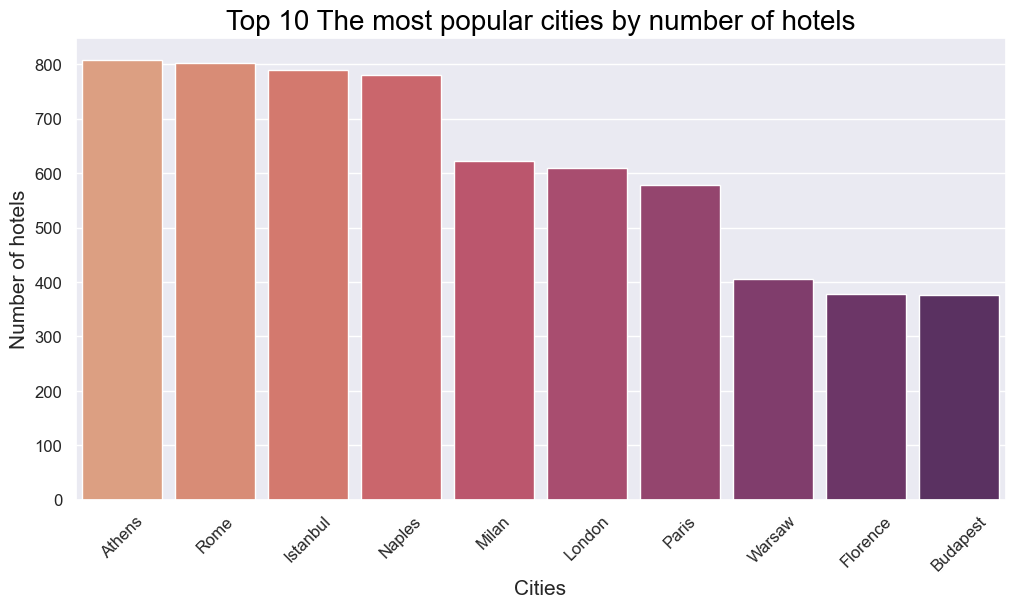

In [34]:
# 1. The most popular cities by number of hotels

popular_cities = all_hotels\
        .groupby('city', as_index = False)\
        .aggregate({'hotel_name' : 'count'})\
        .sort_values(by='hotel_name', ascending=False)\
        .rename(columns={'hotel_name': 'number_of_hotels'})\
        .nlargest(columns='number_of_hotels', n = 10)

# popular_cities.reset_index(inplace=True) -> as_index = False
sns.barplot(data=popular_cities, x = 'city', y = 'number_of_hotels', palette='flare', width=0.85)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Number of hotels', fontsize = 15) 
plt.tick_params(labelsize = 12)
_ = plt.title('Top 10 The most popular cities by number of hotels', c = 'black', fontsize = 20)

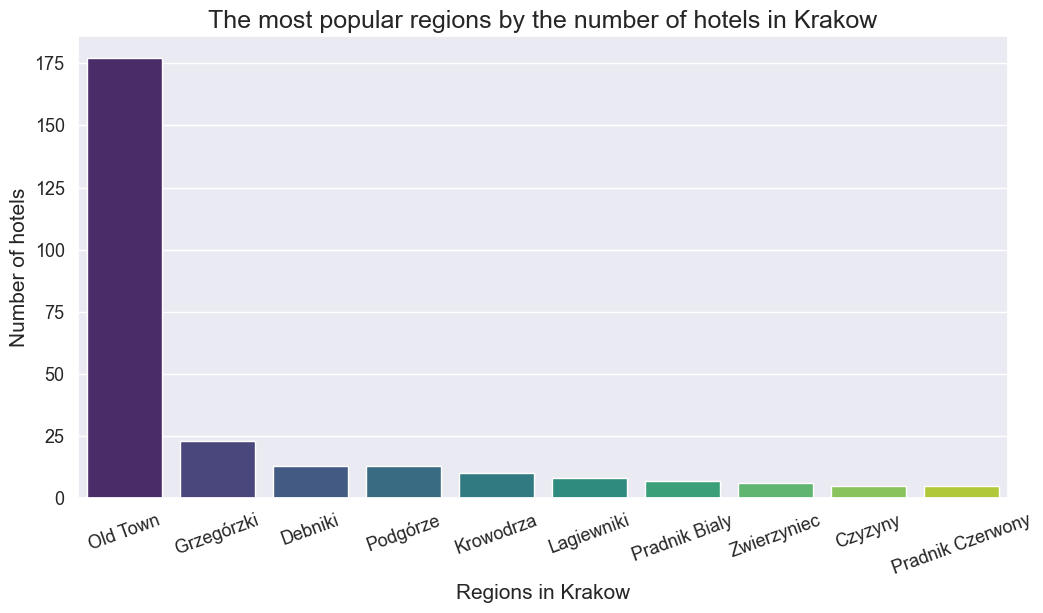

In [35]:
# 2. The most popular regions by the number of hotels in Krakow
krakow_hotels = all_hotels[all_hotels['city'] == 'Krakow']
regions_in_krakow = krakow_hotels\
        .groupby('region')\
        .aggregate({'hotel_name' : 'count'})\
        .sort_values(by='hotel_name', ascending=False)\
        .rename(columns={'hotel_name': 'number_of_hotels'})\
        .nlargest(columns='number_of_hotels', n = 10)

regions_in_krakow.reset_index(inplace=True)
sns.barplot(data = regions_in_krakow, x='region', y = 'number_of_hotels', palette='viridis')
plt.xticks(rotation = 20)
sns.set(rc={'figure.figsize':(12,4)})
plt.xlabel('Regions in Krakow', fontsize = 15)
plt.ylabel('Number of hotels', fontsize = 15)
plt.tick_params(labelsize = 13)
_ = plt.title('The most popular regions by the number of hotels in Krakow', fontsize = 18)

lower_fence: -1740.25
uppper_fence: 3489.75
The most popular marks - 8.3


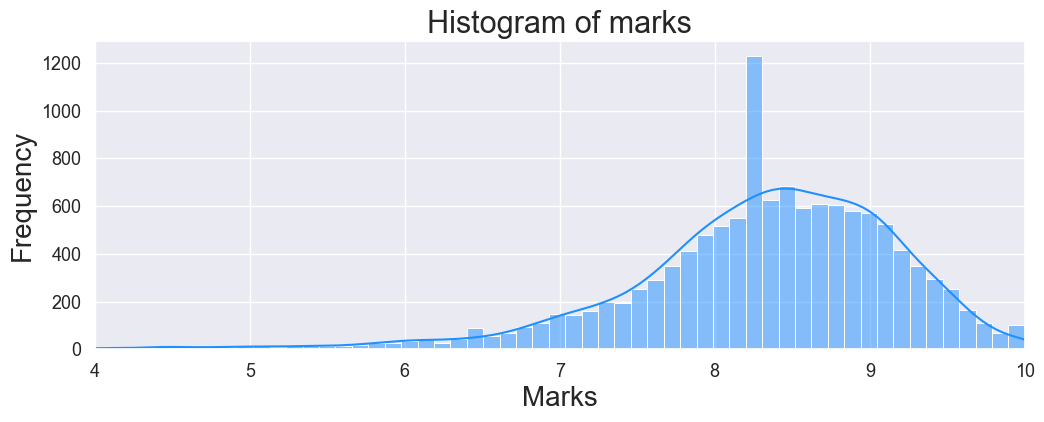

In [41]:
# 3. Histogram of marks
q75, q25 = np.percentile(all_hotels['reviews'], [75 ,25])

# count nterquartile range such as the difference between the 75th and 25th percentiles of the data.
iqr = q75 - q25

# find the lower fence, being Q1 — (1.5*IQR).
lower_fence = q25 - (1.5*iqr)
print(f'lower_fence: {lower_fence}')

# dind the upper fence, being Q3 + (1.5*IQR).
uppper_fence = q75 + (1.5*iqr)
print(f'uppper_fence: {uppper_fence}')

# create a histogram of marks distribution
hotels_by_marks = all_hotels[(all_hotels['reviews'] >= lower_fence) & (all_hotels['reviews'] <= uppper_fence)] #
sns.histplot(data=hotels_by_marks.marks, kde = True, bins = 85, color = 'dodgerblue')
plt.xlim(4,10)
plt.title('Histogram of marks', fontsize = 22)
plt.tick_params(labelsize = 13)
plt.xlabel(xlabel='Marks', fontsize = 20)
plt.ylabel(ylabel='Frequency', fontsize = 20)


print(f'The most popular marks - {round(all_hotels.marks.mean(),2)}')

In [49]:
# 4. Top cities with the largest average of all hotels

# Group cities and apply aggregate function mean to ther marks 
cities_by_average_marks = all_hotels\
    .groupby(by=['city'])\
    .aggregate({'marks' : 'mean'})\
    .sort_values(by = 'marks', ascending=True)\
    .rename(columns={'marks' : 'mean_of_hotels'})\

cities_by_average_marks['mean_of_hotels'] = cities_by_average_marks['mean_of_hotels'].map(lambda number: round(number, 2))
cities_by_average_marks.reset_index(inplace=True)

# 4.1 cities with the highest average marks
top_cities = cities_by_average_marks.nlargest(columns='mean_of_hotels', n = 5)

# 4.2  cities with the lowest average marks
worst_marks = cities_by_average_marks.nsmallest(columns='mean_of_hotels', n = 5)
worst_marks.sort_values(by = 'mean_of_hotels', ascending=False, inplace=True)

# 4.3 Group stars of hotels and apply count aggregate function to the stars 
hotels_rating  = all_hotels\
    .groupby('stars')\
    .aggregate({'stars': 'count'})\
    .rename(columns={'stars' : 'number of hotels'})\

hotels_rating.reset_index(inplace=True)
hotels_rating['stars'] = hotels_rating['stars'].apply(lambda x: str(x))

# 4.4  Group performances of hotels and apply count aggregate function to the performances 
hotels_performances = all_hotels\
    .groupby('performances')\
    .aggregate({'performances' : 'count'})\
    .rename(columns={'performances' : 'number of hotels'})\

hotels_performances.reset_index(inplace=True)

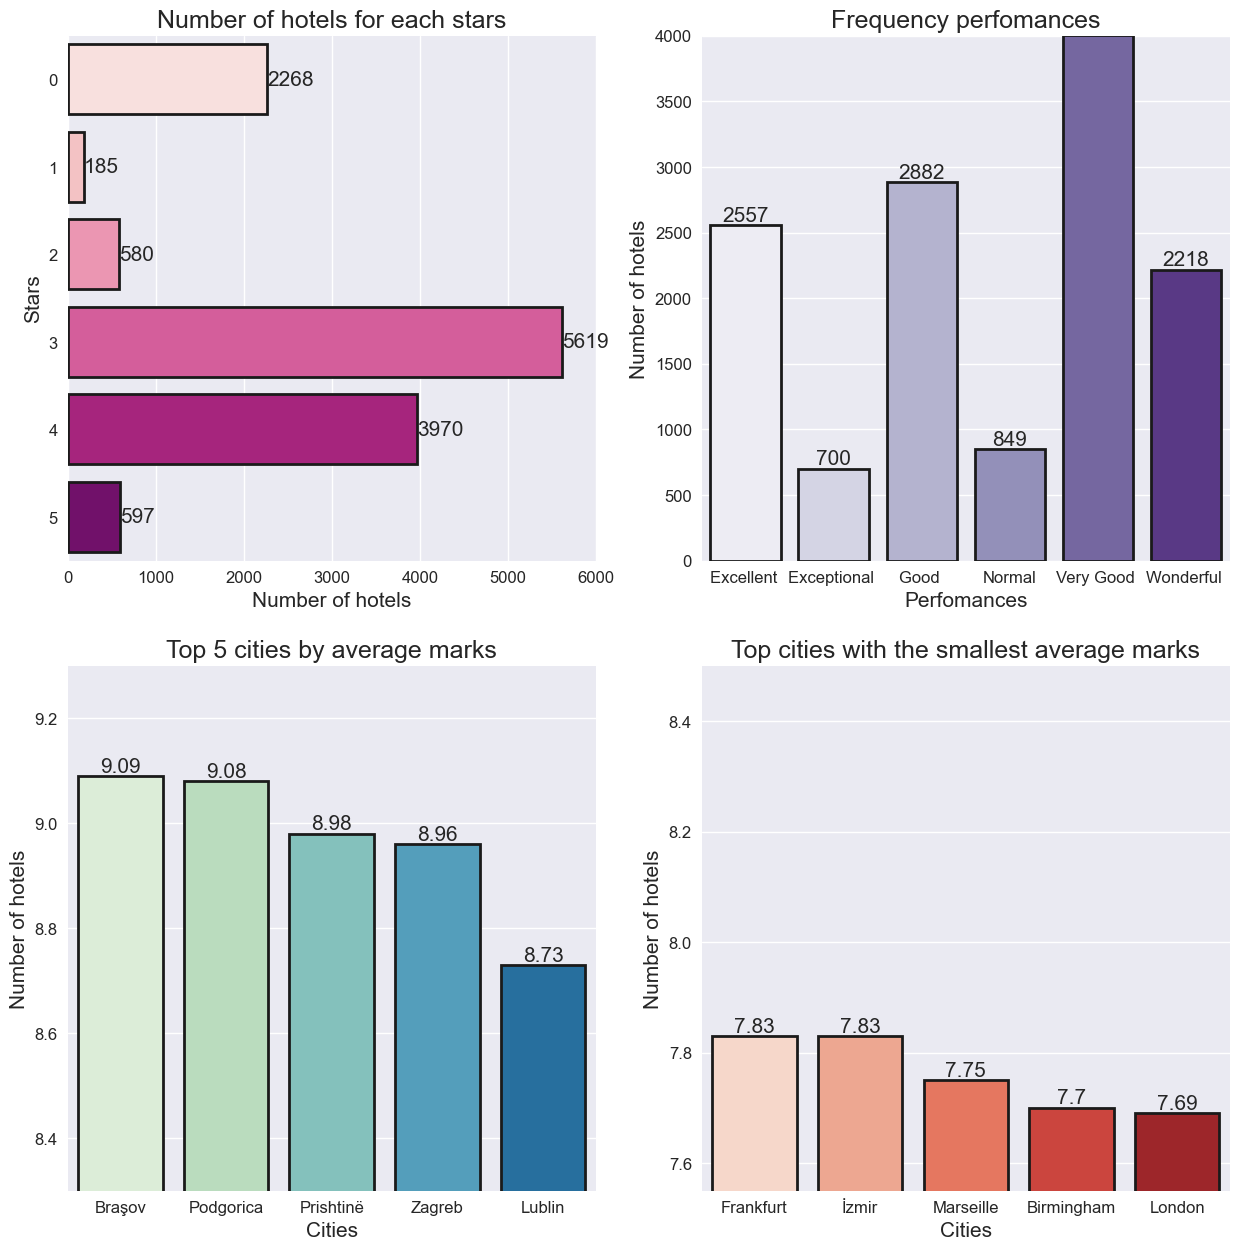

In [52]:
# Change the size of the plot
figure, axes = plt.subplots(2, 2, figsize=(15,15))
plt.style.use('seaborn-v0_8')

def set_axes_parameters(axes0 , axes1, title, xlabel, ylabel, label_size = 12, ylim0 = None, ylim1 = None):

    # add lables for plot
    axes[axes0,axes1].bar_label( axes[axes0,axes1].containers[0],fontsize = 15)

    # change y axis range 
    axes[axes0,axes1].set_ylim(ylim0, ylim1)

    # set name and size of title 
    axes[axes0,axes1].set_title(title,fontsize = 18)

    # set name and size of xlabel 
    axes[axes0,axes1].set_xlabel(xlabel = xlabel, fontsize = 15)
    
    # set name and size of xlabel 
    axes[axes0,axes1].set_ylabel(ylabel = ylabel , fontsize = 15)

    # change size of tick
    axes[axes0,axes1].tick_params(labelsize=12)



# 4.1 Number of hotels for each stars
sns.barplot(ax = axes[0,0], data = hotels_rating, x = 'number of hotels', y = 'stars', palette='RdPu', linewidth=2, edgecolor="k")
set_axes_parameters(0,0, title = 'Number of hotels for each stars', xlabel = 'Number of hotels', ylabel= 'Stars')
axes[0,0].set_xlim(0, 6000) # change x axis range 

# 4.2 Number of hotels for each performances
sns.barplot(ax = axes[0,1], data = hotels_performances, y = 'number of hotels', x = 'performances', palette='Purples', linewidth=2, edgecolor="k")
set_axes_parameters(0,1, title = 'Frequency perfomances', xlabel = 'Perfomances', ylabel= 'Number of hotels', label_size = 11, ylim0=0, ylim1=4000)

# 4.3 Top 5 cities by average marks
sns.barplot(ax=axes[1, 0], data=top_cities, x='city', y='mean_of_hotels', palette='GnBu', linewidth=2, edgecolor="k")
set_axes_parameters(1,0, title = 'Top 5 cities by average marks', xlabel = 'Cities', ylabel= 'Number of hotels', ylim0=8.3, ylim1=9.3)


# 4.4 Top cities with the smallest average marks
sns.barplot(ax=axes[1, 1], data=worst_marks, x='city', y='mean_of_hotels', palette='Reds', linewidth=2, edgecolor="k")
set_axes_parameters(1,1, title = 'Top cities with the smallest average marks', xlabel = 'Cities', ylabel= 'Number of hotels', ylim0=7.55, ylim1=8.5)

In [53]:
# 5 the distribution of performances in hotels, displayed by a scatter plot of reviews by marks
fig = px.scatter(data_frame=all_hotels, x = 'marks', y = 'reviews', color = 'performances')
fig.show()

![](img_plots/5_scatter_plot.png)


In [54]:
# check all unique country in dataset
all_hotels.country.unique()

array(['Norway', 'Croatia', 'Spain', 'France', 'Italy', 'Germany',
       'Switzerland', 'Poland', 'Bulgaria', 'Turkey', 'United Kingdom',
       'Slovakia', 'North Macedonia', 'Netherlands', 'Iceland',
       'Bosnia and Herzegovina', 'Luxembourg', 'Ireland', 'Austria',
       'Slovenia', 'Belgium', 'Moldova', 'Lithuania', 'Kosovo', 'Sweden',
       'Czech Republic', 'Portugal', 'Estonia', 'Hungary', 'Cyprus',
       'Serbia', 'Romania', 'Denmark', 'Albania', 'Latvia', 'Malta',
       'Montenegro', 'Finland', 'Greece'], dtype=object)

In [55]:
# 6. Сreating a Pareto diagram that represents the frequency of hotels in each region of Europe 
def classify_region_of_europe(country):
    '''The function of classifying all cities four regions of Europe'''

    regions_of_europe = {'Eastern Europe': ['Croatia','Poland','Bulgaria','Slovakia','North Macedonia','Bosnia and Herzegovina','Slovenia', 'Moldova', 'Kosovo', 'Czech Republic', 'Hungary', 'Serbia', 'Romania', 'Albania', 'Montenegro'], 
                    'Southern Europe': ['Spain','Italy','Turkey','Portugal','Cyprus','Malta','Greece',],
                    'Western Europe': ['France','Germany','Switzerland','United Kingdom','Netherlands','Luxembourg','Ireland','Austria', 'Belgium'], 
                    'Northern Europe': ['Norway','Iceland','Lithuania','Sweden','Estonia','Denmark','Latvia', 'Finland']
    }

    for region, countries in regions_of_europe.items():
        if country in countries:
            return region        

# apply classify_region_of_europe function to dataframe
all_hotels['region_of_europe'] = all_hotels['country'].map(lambda country: classify_region_of_europe(country))
df_frequency_regions = all_hotels['region_of_europe'].value_counts().reset_index().sort_values(by = 'region_of_europe', ascending=False)
df_frequency_regions.rename(columns={'index' : 'Region of Europe', 'region_of_europe' : 'frequency'}, inplace=True)

# Add cumulative percentage column
df_frequency_regions['cumulative percentage'] = round(df_frequency_regions['frequency'].cumsum()/df_frequency_regions['frequency'].sum(),2)
df_frequency_regions

# plot barplot with cumulative percentage
fig = go.Figure([go.Bar(x=df_frequency_regions['Region of Europe'], y = df_frequency_regions['frequency'],yaxis='y1', name='count', marker_color = '#F02D14'),
                    go.Scatter(x=df_frequency_regions['Region of Europe'], y = df_frequency_regions['cumulative percentage'], yaxis='y2', name='cumulative ratio', marker_color = '#FAA202', marker_size = 10)])
                

fig.update_layout(template='plotly_white', showlegend=False, hovermode='x', bargap=.3,
                    title={'text': 'Pareto Chart', 'x': .5}, 
                    yaxis={'title': 'Frequency'},
                    yaxis_range=[0,7500],
                    yaxis2={'rangemode': "tozero", 'overlaying': 'y',
                            'position': 1, 'side': 'right',
                            'title': 'Ratio',
                            'tickvals': np.arange(0, 1.1, .2),
                            'tickmode': 'array',
                            'ticktext': [str(i) + '%' for i in range(0, 101, 20)]},
                    width= 850,
                    height = 600
                    )

fig.show()



![](img_plots/6_pareto_chart.png)


In [56]:
# use describe function for descriptive statistics in discount_price column
hotels_with_discount_price_summary=  hotels_with_discount_price['discount_price'].describe()

for i_item in hotels_with_discount_price_summary.keys():
    print('{} - {}'.format(i_item, round(hotels_with_discount_price_summary[i_item],2)))

count - 3427.0
mean - 462.73
std - 302.31
min - 23.0
25% - 276.0
50% - 394.0
75% - 563.0
max - 5784.0


In [58]:
# 7. correlaction between original price and discount price

def create_vline(x_coordinate, annotation_text, line_dash, line_color = 'orange'):
    '''Draw verticallines on given plot by using plotly'''

    v_line = fig.add_vline(x = x_coordinate, 
        line_width=3, 
        line_color=line_color,  
        line_dash = 'dash',
        annotation_text=annotation_text, 
        annotation_position  = 'top right'
    )

    return v_line

# create mediana 'discount_price' column
hotels_with_discount_price_median = round(hotels_with_discount_price['discount_price'].median(),3)
mediana_discount_price = create_vline(x_coordinate=hotels_with_discount_price_median, annotation_text = f'Median = {hotels_with_discount_price_median}', line_dash = 'dash')

# create lower control limit
LCL = round(hotels_with_discount_price['discount_price'].median() - 3 * hotels_with_discount_price['discount_price'].std(),3)
if LCL < 0:
    LCL = hotels_with_discount_price['discount_price'].min()
lcl_discount_price = create_vline(x_coordinate=LCL, annotation_text =  f'LCL = {LCL}', line_dash = 'dash', line_color='green')

# create upper control Limit
UCL = round(hotels_with_discount_price['discount_price'].median() + 3 * hotels_with_discount_price['discount_price'].std(),3)

# detect outliers in this sample
df_outilers = hotels_with_discount_price[hotels_with_discount_price['discount_price'] > UCL]
hotel_prices_lcl_ucl = pd.concat([hotels_with_discount_price, df_outilers, df_outilers]).drop_duplicates(keep=False)

# again calculate upper control limit 
UCL = round(hotel_prices_lcl_ucl['discount_price'].median() + 3 * hotels_with_discount_price['discount_price'].std(),3)
print(UCL)
ucl_discount_price = create_vline(x_coordinate=UCL, annotation_text = f'UCL = {UCL}', line_dash = 'dash', line_color='blue')

fig.layout.update(
    annotations=[dict(
          align = "left",
          textangle=90,
          font=dict(
            size=14,
            color="black"
            )
        )
    ]

)
fig.show()

# draw a scatter plot which represent correlaction between original price and discount price
fig = px.scatter(hotel_prices_lcl_ucl, 
        x="discount_price", 
        y = 'original_price', 
        color= 'stars',
        size = 'percentage_discount',
        size_max=25,
        opacity=0.4,
        title="Scatter plot between orignal prices and discount prices",
        width=1100,
        height=600,
        
        color_continuous_scale='Bluered'
        
) 

1295.942


![](img_plots/7_scatter_plot_prices.png)


In [59]:
# 8. Create a pie chart to represent which categories are most common in the dataframe

# make a copy of dataframe
hotels_categories = all_hotels.copy()

def classify_discriptions(discription):
        '''The function simply classifies hotel descriptions 
        and assigns them to a specific category of hotels'''
        
        premium_category = ['premium', 'superior', 'king', 'queen',  'luxury', 'suite', 'executive', 'deluxe']
        motel_category = ['bed in', 'dormitory']
        category = ['room', 'apartment', 'bed in', 'studio', 'house']
        double_rooms = ['double room', 'twin']
        single_rooms = ['single', 'single room', 'solo']
        budgets = ['budget', 'economy'] 

        if category[4] in discription.lower():
            return 'House'

        if category[3] in discription.lower():
            return 'Studio'

        if 'standard' in discription.lower():
            return 'Standard'

        if category[1] in discription.lower():
            return 'Apartment'

        for elem in range(len(budgets)):
            if budgets[elem] in discription.lower():
                return 'Budget'

        for elem in range(len(single_rooms)):
            if single_rooms[elem] in discription.lower():
                return 'Single room'

        for elem in range(len(motel_category)):
                    if motel_category[elem] in discription.lower():
                        return 'Motel'    

        for elem in range(len(premium_category)):
            if premium_category[elem] in discription.lower():
                return 'High standard'
        
        
        for elem in range(len(double_rooms)):
            if double_rooms[elem] in discription.lower():
                return 'Double room'

        if 'room' in discription.lower():
            return 'Room'
        

# apply classify_discriptions function to dataframe and create new column calls category 
hotels_categories['category'] = hotels_categories['discriptions'].apply(lambda discription: classify_discriptions(discription))
hotels_categories['category'].value_counts()

# if the description does not fit any of the categories, then add to the 'category' column 'Other'
hotels_categories.category.isnull().sum() # 408
hotels_categories.category.fillna('Other', inplace=True)
hotels_categories.category.isnull().sum() # 0 

series = hotels_categories.category.value_counts()
df = series.reset_index()
df_categories = df.rename(columns={'category' : 'frequency', 'index' : 'categories'})


# create a pie chart to represent caregories of hotels
pie_plot = px.pie(data_frame=df_categories, 
        names = df_categories.categories,
        values= df_categories.frequency,
        title='Сategories of hotels',
        width=650,
        height=450,
        color_discrete_sequence=px.colors.sequential.RdBu,
    )
pie_plot.update_layout(uniformtext_minsize=13, uniformtext_mode='hide')

pie_plot.show()

df_categories

,categories,frequency
0,Double room,2914
1,Single room,2501
2,Standard,1971
3,High standard,1820
4,Apartment,1617
5,Studio,716
6,Budget,635
7,Motel,494
8,Room,400
9,Other,110


![](img_plots/8_pie_chart.png)


In [64]:
# 9. Create scatter plot to represent how the original prices related to the distance of the hotel from the city center
scatter_plt = px.scatter(data_frame=hotels_categories, 
    y = 'distances', 
    x = 'original_price', 
    facet_col='category', 
    facet_col_wrap=3, 
    color = 'stars',
    width=1000,
    height=1000,
    #color_continuous_scale='Plotly3'
)

scatter_plt.show()

![](img_plots/9_scatter_plot_distances_prices.png)



In [76]:
# 10. Create a bar chart to show which categories of hotels offer discounts 

# apply classify_discriptions function to 'hotels_with_discount_price' dataframe and create new column calls category 
hotels_with_discount_price['category'] = hotels_with_discount_price['discriptions'].map(lambda description: classify_discriptions(description))

def modify_df(df):

    df = df['category'].value_counts().reset_index()
    df.rename(columns={'category': 'frequency', 'index' : 'category'}, inplace=True)
    
    return df

df1 = modify_df(hotels_with_discount_price)
df1.sort_values(by = 'category', inplace=True, ignore_index=True)

df2 = modify_df(hotels_categories)
df2 = df2[df2.index != 9]
df2.sort_values(by = 'category', inplace=True, ignore_index=True)

df3 = pd.concat([df1, df2], join = 'inner', ignore_index=False, axis = 1)
df3.columns = [f'category {i}' for i,_ in enumerate(df3.columns)]
df3['percantage'] = round((df3['category 1'] / df3['category 3'])*100,2)

# creating bar chart 
categories_bar_chart = px.bar(data_frame=df3, 
    y = 'percantage', 
    x = 'category 0', 
    color = 'category 0', 
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=1000,
    height=600,
    title="Which category of hotels offer discounts"
)

categories_bar_chart.update_xaxes(title_text='Categories')
categories_bar_chart.update_yaxes(title_text = 'Percanteage')
categories_bar_chart.update_layout(title={'text': 'Which category of hotels offer discounts', 'x': .5}, yaxis_range=[0,40], showlegend=False)

![](img_plots/10_bar_chart_categories.png)


## Visualization with tablaeu:


In [68]:
booking_hotels = all_hotels.copy()

# add category column in dataframe
booking_hotels['category'] = booking_hotels['discriptions'].map(lambda discription: classify_discriptions(discription))

# add regions of europe column in dataframe
booking_hotels['regions of europe'] = booking_hotels['country'].map(lambda country: classify_region_of_europe(country))

booking_hotels.to_csv('booking_hotels.csv')
booking_hotels.head()

,hotel_name,marks,performances,reviews,distances,discriptions,stars,breakfast,guests_reviews:,region,city,original_price,discount_price,country,region_of_europe,category,regions of europe
0,"Radisson Blu Royal Hotel, Bergen",8.2,Very Good,7620,0.60,Standard Room,4,NaN,Location 9.4,Bergenhus,Bergen,574,NaN,Norway,Northern Europe,Standard,Northern Europe
1,Moxy Bergen,8.3,Very Good,2170,1.60,"Standard, Guest room, 1 Queen",3,Breakfast included,NaN,Årstad,Bergen,554,NaN,Norway,Northern Europe,Standard,Northern Europe
2,Citybox Bergen City,8.1,Very Good,5861,0.60,Single Room,3,NaN,NaN,Bergenhus,Bergen,444,NaN,Norway,Northern Europe,Single room,Northern Europe
3,Fabryka,7.7,Good,407,0.35,Budget Single Room,0,NaN,Location 9.3,Bergenhus,Bergen,184,NaN,Norway,Northern Europe,Budget,Northern Europe
4,Comfort Hotel Bergen,8.0,Very Good,730,0.60,Standard Double Room,3,Breakfast included,NaN,Bergenhus,Bergen,466,434,Norway,Northern Europe,Standard,Northern Europe
